In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import os 
import sys

In [3]:
# データセット読込
df = pd.read_csv("measurements.csv")

In [4]:
# データの情報
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null float64
consume          388 non-null float64
speed            388 non-null int64
temp_inside      376 non-null float64
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null float64
refill gas       13 non-null object
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [5]:
# データの先頭5行を表示
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [6]:
# 空欄がないかのチェック
df.isnull()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,True,True
2,False,False,False,False,False,True,False,False,False,False,True,True
3,False,False,False,False,False,True,False,False,False,False,True,True
4,False,False,False,False,False,True,False,False,False,False,True,True
5,False,False,False,False,False,True,False,False,False,False,True,True
6,False,False,False,False,False,True,False,False,False,False,True,True
7,False,False,False,False,False,True,False,False,False,False,True,True
8,False,False,False,False,False,True,False,False,False,False,True,True
9,False,False,False,False,False,True,False,False,False,False,True,True


In [7]:
# 質的変数をダミー変数化して数値に変換する
df = pd.get_dummies(df)

In [8]:
# すべてのデータを表示
df

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,specials_AC,...,specials_ac rain,specials_half rain half sun,specials_rain,specials_snow,specials_sun,specials_sun ac,gas_type_E10,gas_type_SP98,refill gas_E10,refill gas_SP98
0,28.0,5.0,26,21.5,12,0,0,0,45.0,0,...,0,0,0,0,0,0,1,0,1,0
1,12.0,4.2,30,21.5,13,0,0,0,NaN,0,...,0,0,0,0,0,0,1,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,NaN,0,...,0,0,0,0,0,0,1,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,NaN,0,...,0,0,0,0,0,0,1,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,NaN,0,...,0,0,0,0,0,0,1,0,0,0
5,8.3,6.4,50,21.5,10,0,0,0,NaN,0,...,0,0,0,0,0,0,1,0,0,0
6,7.8,4.4,43,21.5,11,0,0,0,NaN,0,...,0,0,0,0,0,0,1,0,0,0
7,12.3,5.0,40,21.5,6,0,0,0,NaN,0,...,0,0,0,0,0,0,1,0,0,0
8,4.9,6.4,26,21.5,4,0,0,0,NaN,0,...,0,0,0,0,0,0,1,0,0,0
9,11.9,5.3,30,21.5,9,0,0,0,NaN,0,...,0,0,0,0,0,0,1,0,0,0


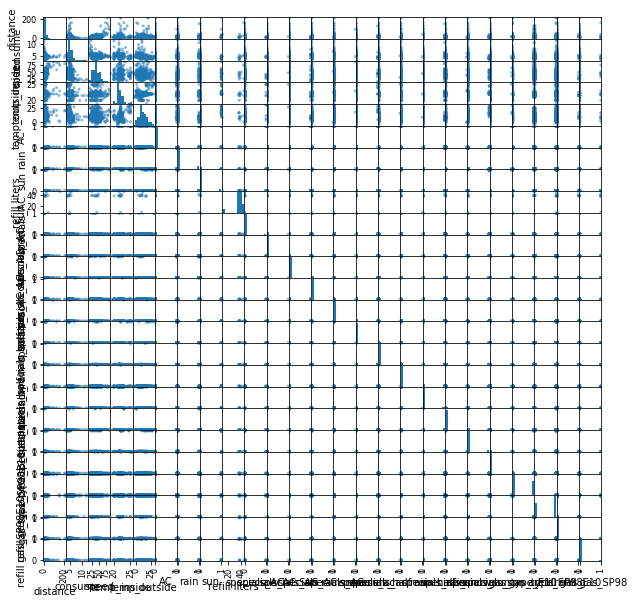

In [9]:
# 散布図行列の表示
pd.plotting.scatter_matrix(df, figsize=(10,10))
plt.show()

In [10]:
# 共分散行列を表示する
df.corr().style.background_gradient(cmap="autumn_r")

C:\Users\N394\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,specials_AC,specials_AC Sun,specials_AC rain,specials_AC snow,specials_AC sun,specials_ac,specials_ac rain,specials_half rain half sun,specials_rain,specials_snow,specials_sun,specials_sun ac,gas_type_E10,gas_type_SP98,refill gas_E10,refill gas_SP98
distance,1,-0.128967,0.562299,0.0753051,0.0881753,-0.0257382,-0.0197907,0.0811198,0.132852,-0.0438422,0.00414763,-0.042487,-0.0165101,0.166715,0.0884287,-0.00797756,0.0539956,0.0107227,-0.0293204,0.0557366,-0.00605488,0.0534114,-0.0534114,0.0260788,0.106134
consume,-0.128967,1,-0.227866,-0.161991,-0.320811,0.0965914,0.248118,-0.170667,0.100868,-0.0278188,-0.00553589,0.0860998,0.107772,-0.00553589,-0.0316209,0.00924341,-0.0104623,0.157122,0.0217549,-0.168194,-0.0409815,0.015327,-0.015327,-0.0257309,-0.0790795
speed,0.562299,-0.227866,1,0.0597254,0.015411,-0.035408,0.00948946,0.0816183,0.0496728,-0.0762349,0.0189848,-0.0344821,0.0376995,0.172445,-0.0125836,-0.0446452,0.00775599,0.0381563,0.0156352,0.0335234,0.0481341,0.0973604,-0.0973604,-0.0734278,0.0461767
temp_inside,0.0753051,-0.161991,0.0597254,1,0.361308,0.297775,-0.0373556,0.24612,0.034128,0.187668,0.157127,-0.0666552,0.0291934,0.0547802,0.247728,0.157127,0.00360665,-0.0700962,0.0951361,0.154083,0.198821,-0.0103403,0.0103403,-0.0149005,-0.0170981
temp_outside,0.0881753,-0.320811,0.015411,0.361308,1,0.167562,-0.186315,0.346903,-0.0848665,0.14015,0.113872,-0.0741143,-0.0826881,0.048352,0.187366,0.033792,-0.0171681,-0.122726,-0.139378,0.300752,0.121892,-0.148705,0.148705,-0.00913481,-0.0438089
AC,-0.0257382,0.0965914,-0.035408,0.297775,0.167562,1,0.242915,0.088598,nan,0.432937,0.1756,0.532332,0.1756,0.1756,0.433323,0.1756,-0.0147151,-0.0867899,-0.0255534,-0.0791676,0.304938,-0.105285,0.105285,-0.0330754,-0.0420022
rain,-0.0197907,0.248118,0.00948946,-0.0373556,-0.186315,0.242915,1,-0.11265,-0.494501,-0.0470896,-0.0190997,0.410129,0.135289,-0.0190997,-0.0545173,0.135289,0.135289,0.797937,0.234936,-0.102757,-0.0331674,-0.0603282,0.0603282,0.0264739,0.0556531
sun,0.0811198,-0.170667,0.0816183,0.24612,0.346903,0.088598,-0.11265,1,nan,-0.0375746,0.169549,-0.046201,-0.0152403,0.169549,-0.0435014,-0.0152403,-0.0152403,-0.0898876,-0.0264655,0.912175,0.294429,-0.022761,0.022761,-0.0342559,-0.0435014
refill liters,0.132852,0.100868,0.0496728,0.034128,-0.0848665,nan,-0.494501,nan,1,nan,nan,nan,nan,nan,nan,nan,-0.948747,0.123243,nan,nan,nan,0.238081,-0.238081,0.238081,-0.238081
specials_AC,-0.0438422,-0.0278188,-0.0762349,0.187668,0.14015,0.432937,-0.0470896,-0.0375746,nan,1,-0.00637072,-0.0193128,-0.00637072,-0.00637072,-0.0181843,-0.00637072,-0.00637072,-0.0375746,-0.011063,-0.0342746,-0.011063,-0.0625549,0.0625549,-0.0143196,-0.0181843


In [11]:
# 係数を求める
y = df["consume"].values
X = df[["distance","speed","gas_type_E10","gas_type_SP98"]].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]
w4 = regr.coef_[3]

In [12]:
# 変数の設定
x1 = df["distance"].values
x2 = df["speed"].values
x3 = df["gas_type_E10"].values
x4 = df["gas_type_SP98"].values
y = df["consume"].values

# 重みと二乗誤差の確認
y_est = w0 + w1 * x1 + w2 * x2 + x3*w3 + x4*w4 
squared_error = 0.5 * np.sum((y_est - y) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, 二乗誤差 = {:.3f}'.format(w0, w1, w2,w3,w4,squared_error))

w0 = 5.656, w1 = -0.000, w2 = -0.018, w3 = 0.040, w4 = -0.040, 二乗誤差 = 195.532


In [13]:
# ラベルを予測
y_est = regr.predict(X)
y_est

array([5.23800802, 5.16867382, 5.02836806, 5.06336578, 4.88763723,
       4.81799864, 4.94082916, 4.9932234 , 5.23922029, 5.16867907,
       4.95813122, 5.02833658, 4.65989752, 4.67679025, 4.88795735,
       5.27365648, 5.06228996, 5.13359738, 5.01005315, 4.99324964,
       5.13288891, 5.02821063, 5.04555992, 5.06342351, 4.60726712,
       4.69497921, 5.32622916, 5.20342489, 5.18588667, 5.08062062,
       4.80024526, 5.18622778, 4.67744099, 4.99215808, 5.06304566,
       5.06340777, 5.04544971, 5.23922029, 5.29148859, 4.67744099,
       4.73006614, 5.18661088, 5.04588529, 4.92315974, 5.05455409,
       5.24771066, 5.05409227, 5.17680208, 5.17702249, 4.98323092,
       5.10684862, 4.5104337 , 4.54546816, 4.80854145, 5.12469122,
       4.16960857, 5.19456596, 4.54543143, 4.61560005, 4.70332263,
       5.30029383, 5.21261847, 5.19467092, 5.15974142, 5.19453447,
       4.61560005, 4.89632701, 4.65069223, 4.91375503, 4.96650088,
       4.65069223, 5.26525412, 5.10673842, 4.87889375, 5.17703

In [14]:
# 誤差の計算
mse = mean_squared_error(y,y_est)
print("二乗誤差（MSE） = %s"%round(mse,3))

mae = mean_absolute_error(y,y_est)
print("平方根二乗誤差（RMSE) = %s"%round(mae,3))

rmse = np.sqrt(mse)
print("絶対値誤差（MAE） = %s"%round(rmse,3))

二乗誤差（MSE） = 1.008
平方根二乗誤差（RMSE) = 0.68
絶対値誤差（MAE） = 1.004
